<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_05_recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture objectives:

* Familiarize yourself with recursion, call stack
* Learn how to think about recursion in different ways
* Explore different recursion problems
* Undertand memoisation concept
* Familiarize yourself with tail recursion and TLO (Tail Recursion Optimization)

# What is recursion

**Recursion** is a method of solving a computational problem where the solution depends on solutions to smaller instances of the same problem. Recursion solves such recursive problems by using functions that call themselves from within their own code.

# Stack overflow

Every function call generates a new stack frame with the local parameters and variables that is created and inserted in a call stack. This requires extra time for stack management and space in the call stack. Thus it's better to avoid using resursion in production code.

If the recursion depth exceeds maximum call stack size the infamous stack overflow occures.

# Broader context

A common algorithm design tactic is to divide a problem into sub-problems of the same type as the original, solve those sub-problems, and combine the results. This is often referred to as the divide-and-conquer method; when combined with a lookup table that stores the results of previously solved sub-problems (to avoid solving them repeatedly and incurring extra computation time), it can be referred to as dynamic programming or memoization.

# Recursion in datastructures

In [ ]:
#@title ###Recursive datastructures
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="172mm" height="132mm" version="1.1" viewBox="0 0 351.73 270.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.0872 2.1382)">
  <rect x="23.045" y="119.36" width="127.38" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="29.471" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="52.15" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="74.828" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="97.507" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="120.19" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="242.19" y="119.66" width="103" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="248.26" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="270.94" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="293.62" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="316.3" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="190.98" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14 110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-279.08 -139.58)">
    <g transform="translate(-164.95 -2.1696)" style="fill:#000000">
     <g transform="translate(287.32 146.72)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(294.79 146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95 -2.1696)" style="fill:#000000">
     <g transform="translate(299.56 146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95 -2.1696)" style="fill:#000000">
     <g transform="translate(304.33 146.72)">
      <path id="id-95a442ff-7b3a-4796-9318-c71505db4cbe" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(309.59 146.72)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-161.78 -2.1696)" style="fill:#000000">
     <g transform="translate(314.84 146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767 -20.154)" style="fill:#000000">
     <g transform="translate(278.74 164.65)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(286.21 164.65)">
      <path id="id-ed1fe552-68b0-4439-a169-d3de5377ef9f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767 -20.154)" style="fill:#000000">
     <g transform="translate(290.98 164.65)">
      <path id="id-1196bbe1-1e89-4727-863c-5ce2e088b1da" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767 -20.154)" style="fill:#000000">
     <g transform="translate(295.75 164.65)">
      <path id="id-446064ff-f85e-4f33-a316-8f8fe5da15aa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(301.01 164.65)">
      <path id="id-eb1ccc30-edd2-48c3-8613-2237b53e7e3d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g transform="translate(66.942 -20.154)" style="fill:#000000">
     <g transform="translate(306.26 164.65)">
      <path id="id-48d40f30-cc03-4906-8c93-914af5d28f3f" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(64.296 -20.154)" style="fill:#000000">
     <g transform="translate(317.57 164.65)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g transform="translate(62.179 -20.154)" style="fill:#000000">
     <g transform="translate(327.53 164.65)">
      <path id="id-ff6599c8-afe3-4c0a-bd57-922c8a43d4cf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -262.79 -153.41)" style="fill:#000000">
     <g transform="translate(296.49 182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-a865b69d-bb47-44bc-ab1f-32ef0b4e920d" transform="matrix(1.7811 0 0 1.7811 -256.44 -153.41)" style="fill:#000000">
     <g transform="translate(307.01 182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="172mm" height="132mm" version="1.1" viewBox="0 0 351.73 270.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-32" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-9-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-32-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.0872 2.1382)">
  <rect x="242.19" y="119.66" width="110" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="11.933" y="119.36" width="147.41" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="20.475" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="55.778" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="190.98" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14 110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-279.08 -139.58)">
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-152.25 -2.1696)" style="fill:#000000">
     <g transform="translate(314.84 146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g transform="translate(85.992 -20.154)" style="fill:#000000">
     <g transform="translate(306.26 164.65)">
      <path id="id-48d40f30-cc03-4906-8c93-914af5d28f3f" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(83.346 -20.154)" style="fill:#000000">
     <g transform="translate(317.57 164.65)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g transform="translate(81.229 -20.154)" style="fill:#000000">
     <g transform="translate(327.53 164.65)">
      <path id="id-ff6599c8-afe3-4c0a-bd57-922c8a43d4cf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -262.79 -153.41)" style="fill:#000000">
     <g transform="translate(296.49 182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-a865b69d-bb47-44bc-ab1f-32ef0b4e920d" transform="matrix(1.7811 0 0 1.7811 -256.44 -153.41)" style="fill:#000000">
     <g transform="translate(307.01 182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(21.805 -2.2596)" style="fill:#000000"></g>
    <g transform="translate(445.49 237.99)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Linked list$" ns16:version="1.1.0">
     <defs></defs>
     <g transform="translate(-149.1 -127.84)">
      <g transform="translate(-105.27 -100.54)" style="fill:#000000">
       <g transform="translate(148.71 134.76)">
        <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
       </g>
       <g transform="translate(155.49 134.76)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(158.92 134.76)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
       <g transform="translate(164.9 134.76)">
        <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
       </g>
      </g>
      <g style="fill:#000000">
       <g transform="translate(65.144 34.223)">
        <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(69.782 34.223)">
        <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(78.143 34.223)">
        <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
       </g>
      </g>
      <g transform="translate(-102.09 -100.54)" style="fill:#000000">
       <g transform="translate(183.4 134.76)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(186.83 134.76)">
        <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
       </g>
       <g transform="translate(191.5 134.76)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
  <path d="m44.05 135.82h10.206" style="fill:none;marker-end:url(#Arrow1Mend);stroke-width:.52;stroke:#afafaf"/>
  <rect x="91.36" y="124.44" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m79.632 135.81h10.206" style="fill:none;marker-end:url(#Arrow1Mend-9);stroke-width:.52;stroke:#afafaf"/>
  <rect x="126.46" y="124.41" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m114.73 135.77h10.207" style="fill:none;marker-end:url(#Arrow1Mend-32);stroke-width:.52;stroke:#afafaf"/>
  <rect x="249.72" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="285.3" y="124.58" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m273.57 135.94h10.206" style="fill:none;marker-end:url(#Arrow1Mend-9-3);stroke-width:.52;stroke:#afafaf"/>
  <rect x="320.4" y="124.54" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m308.67 135.9h10.207" style="fill:none;marker-end:url(#Arrow1Mend-32-5);stroke-width:.52;stroke:#afafaf"/>
  <g transform="translate(116.92 208.54)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Linked list$" ns16:version="1.1.0">
   <defs id="id-e8a5244e-0fac-4310-aec1-7f008fe1580c"></defs>
   <g id="id-3317a18e-3c6f-4f71-83b3-03b80fcb18fd" transform="translate(-149.1 -127.84)">
    <g transform="translate(-105.27 -100.54)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
     </g>
     <g transform="translate(155.49 134.76)">
      <path id="id-59c760c0-861d-48ee-8935-081bfe86bcea" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(158.92 134.76)">
      <path id="id-c6b3cb8f-49cc-40dd-9073-241e6e7ea5ec" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(164.9 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(65.144 34.223)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(69.782 34.223)">
      <path id="id-b510ee12-93b3-474c-88e3-75d0d792252d" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(78.143 34.223)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="translate(-102.09 -100.54)" style="fill:#000000">
     <g transform="translate(183.4 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(186.83 134.76)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(191.5 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>


<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="172mm" height="132mm"version="1.1" viewBox="0 0 351.73 270.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.0872 2.1382)">
  <rect x="18.083" y="28.201" width="125.83" height="200.7" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:2.276"/>
  <rect x="71.232" y="34.912" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <g transform="translate(176.43 110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-279.08 -139.58)">
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -271.26 -153.41)" style="fill:#000000">
     <g transform="translate(296.49 182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g transform="translate(21.805 -2.2596)" style="fill:#000000"></g>
   </g>
  </g>
  <rect x="33.046" y="91.162" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="108.53" y="90.731" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="20.812" y="147.97" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="43.762" y="148.04" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m41.598 109.71-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m41.598 109.71 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m80.354 53.372-37.684 37.181" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m80.354 53.372 37.845 36.951" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="42.922" y="204.53" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m52.845 166.56-0.11397 37.607" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="97.144" y="147.43" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="120.09" y="147.51" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m117.93 109.18-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m117.93 109.18 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="85.705" y="204.23" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="108.66" y="204.3" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m106.49 165.97-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m106.49 165.97 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="178.84" y="81.3" width="54.206" height="147.6" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:1.281"/>
  <rect x="251.04" y="34.912" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="193.8" y="91.162" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="317.97" y="90.731" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="181.57" y="147.97" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="204.52" y="148.04" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m202.36 109.71-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m202.36 109.71 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="203.68" y="204.53" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m213.6 166.56-0.11397 37.607" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="306.59" y="147.43" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="329.54" y="147.51" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m327.37 109.18-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m327.37 109.18 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="295.15" y="204.23" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="318.1" y="204.3" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m315.93 165.97-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m315.93 165.97 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="290.2" y="81.3" width="63.293" height="147.6" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:1.3843"/>
  <g transform="matrix(1.5635 0 0 1.5635 235.58 132.66)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$+$" ns16:version="1.1.0">
   <defs></defs>
   <g id="id-5218b681-a097-44ce-8272-1f40f47ebfff" transform="translate(-149.28 -128.95)">
    <g id="id-b7eb58c8-e998-4be7-ade3-b772b9e2d41e" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-a3d5e173-e6d7-4db2-a5cc-ad1f8b3b5deb" d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(1.5635 0 0 1.5635 277.02 132.6)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$+$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.28 -128.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="translate(18.179 19.258)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Binary tree$" ns16:version="1.1.0">
   <defs id="id-e1221a59-268a-4750-817f-0930c5def62b"></defs>
   <g id="id-5d2996b0-2fc7-4111-8477-9a360b91000e" transform="translate(-149.13 -127.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-e3420ad5-cf75-47fa-9541-46564da9d88c" d="m1.5938-0.78125c-0.09375 0.39062-0.125 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h3.5625c1.5781 0 2.75-1.1719 2.75-2.1562 0-0.71875-0.57812-1.2969-1.5469-1.4062 1.0312-0.1875 2.0781-0.92188 2.0781-1.875 0-0.73438-0.65625-1.375-1.8438-1.375h-3.3594c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125-0.015625 0.0625-0.03125 0.1875zm1.5-2.875 0.625-2.4688c0.09375-0.34375 0.10938-0.375 0.53125-0.375h1.2969c0.875 0 1.0781 0.59375 1.0781 1.0312 0 0.875-0.85938 1.8125-2.0625 1.8125zm-0.4375 3.3438h-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.0625-0.21875l0.6875-2.7812h1.875c0.95312 0 1.1562 0.73438 1.1562 1.1562 0 0.98438-0.89062 1.9531-2.0781 1.9531z"/>
     </g>
    </g>
    <g id="id-9d43e7d9-8635-4f71-b58c-7183685540ac" style="fill:#000000">
     <g transform="translate(156.77 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(160.2 134.76)">
      <path id="id-58e63adc-62fb-4b65-9c8e-eadcfd71166c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(166.18 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(171.44 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-3f4fb05d-e716-4f9b-b00e-4f07fd2c512b" style="fill:#000000">
     <g transform="translate(176.22 134.76)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(181.46 134.76)">
      <path id="id-563a3dfe-b9ac-48f7-a7d8-337f3a0a81ae" d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(185.06 134.76)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(189.83 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(194.47 134.76)">
      <path id="id-8a5f5541-a06d-4a55-bcbb-051511dd065d" d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="translate(178.95 72.65)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Binary tree$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m1.5938-0.78125c-0.09375 0.39062-0.125 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h3.5625c1.5781 0 2.75-1.1719 2.75-2.1562 0-0.71875-0.57812-1.2969-1.5469-1.4062 1.0312-0.1875 2.0781-0.92188 2.0781-1.875 0-0.73438-0.65625-1.375-1.8438-1.375h-3.3594c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125-0.015625 0.0625-0.03125 0.1875zm1.5-2.875 0.625-2.4688c0.09375-0.34375 0.10938-0.375 0.53125-0.375h1.2969c0.875 0 1.0781 0.59375 1.0781 1.0312 0 0.875-0.85938 1.8125-2.0625 1.8125zm-0.4375 3.3438h-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.0625-0.21875l0.6875-2.7812h1.875c0.95312 0 1.1562 0.73438 1.1562 1.1562 0 0.98438-0.89062 1.9531-2.0781 1.9531z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(156.77 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(160.2 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(166.18 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(171.44 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(176.22 134.76)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(181.46 134.76)">
      <path d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(185.06 134.76)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(189.83 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(194.47 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="translate(290.12 72.277)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Binary tree$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m1.5938-0.78125c-0.09375 0.39062-0.125 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h3.5625c1.5781 0 2.75-1.1719 2.75-2.1562 0-0.71875-0.57812-1.2969-1.5469-1.4062 1.0312-0.1875 2.0781-0.92188 2.0781-1.875 0-0.73438-0.65625-1.375-1.8438-1.375h-3.3594c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125-0.015625 0.0625-0.03125 0.1875zm1.5-2.875 0.625-2.4688c0.09375-0.34375 0.10938-0.375 0.53125-0.375h1.2969c0.875 0 1.0781 0.59375 1.0781 1.0312 0 0.875-0.85938 1.8125-2.0625 1.8125zm-0.4375 3.3438h-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.0625-0.21875l0.6875-2.7812h1.875c0.95312 0 1.1562 0.73438 1.1562 1.1562 0 0.98438-0.89062 1.9531-2.0781 1.9531z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(156.77 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(160.2 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(166.18 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(171.44 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(176.22 134.76)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(181.46 134.76)">
      <path d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(185.06 134.76)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(189.83 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(194.47 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

# Basic Recursion

Every recursive program has the following structure
* base case
* **recursive call**
* *calculations*
* **recursive call**
* *calculation*
* ...

The base case could be explicit:
  

In [ ]:
def reverse_array_1(n, i=0):
  if i>=len(n)/2: return
  n[i], n[-i-1] = n[-i-1], n[i]
  reverse_array_1(n, i+1)

or implicit

In [ ]:
def reverse_array_1(n, i=0):
  if i<len(n)/2:
    n[i], n[-i-1] = n[-i-1], n[i]
    reverse_array_1(n, i+1)

Recursion that contains only a single self-reference is known as **single recursion**,

In [ ]:
def factorial(n) :
  if n==0: return 1
  return n * factorial(n-1)

while recursion that contains multiple self-references is known as **multiple recursion**

In [1]:
def fib(n):
  if n==0 or n==1: return 1
  return fib(n-1) + fib(n-2)

# Miscellanious recursive algorithms

## Lazy evaluation

```
Find the sum of integers in an array
```

In [ ]:
# time: O(N); space: O(N)(call stack)
def recursive_sum(n):
  if not n: return 0
  return n[-1] + recursive_sum(n[:-1])

recursive_sum([1,2,3])

6

```
Return reversed array
```

In [ ]:
# time: O(N); space: O(N)(call stack)
def recursive_sum(n):
  if not n: return []
  return [n[-1]] + recursive_sum(n[:-1])

recursive_sum([1,2,3])

[3, 2, 1]

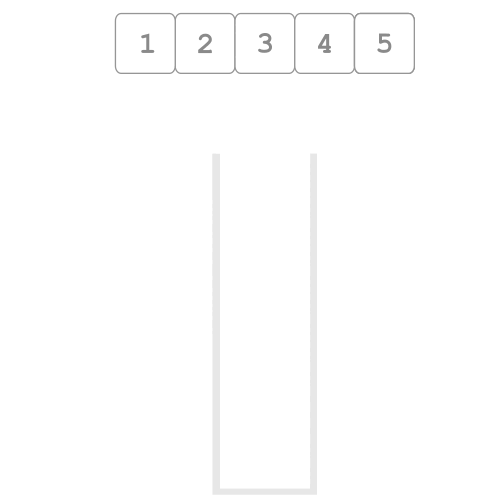

## Factorial

```
Calculate factorial of a number.
```

In [ ]:
# time: O(N); space: O(N)(call stack)
def f(n) :
  if n==0: return 1
  return n * f(n-1)

f(5)

## Fibonacci

[509. Fibonacci Number](https://leetcode.com/problems/fibonacci-number/)

```
The Fibonacci numbers, commonly denoted F(n) form a sequence, called the Fibonacci sequence,
such that each number is the sum of the two preceding ones, starting from 0 and 1. That is,

F(0) = 0, F(1) = 1

F(n) = F(n - 1) + F(n - 2), for n > 1.

Given n, calculate F(n).
```

In [ ]:
def fib(n):
  if n==0 or n==1: return 1
  return fib(n-1) + fib(n-2)

fib(5)

8

In [ ]:
#@title ###Fibonacci recursion
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="146.3mm" height="173.2mm" version="1.1" viewBox="0 0 299.2 356.24" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-34.861 72.539)">
  <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="116.55" y="22.324" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="256.36" y="22.182" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="78.523" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="152.32" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="219.64" y="99.461" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="292.63" y="99.408" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="56.929" y="175.26" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="98.778" y="175.51" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55-14.53 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="41.951" y="251.67" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="70.769" y="251.81" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55 14.509 52.061" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m90.124 122.8-21.619 52.059" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m90.124 122.8 21.26 52.52" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m198.35-44.369-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m198.35-44.369 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <path d="m128.44 46.608-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m128.22 46.825 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="130.67" y="175.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="172.52" y="175.55" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m163.87 122.84-21.68 52.274" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m163.87 122.84 21.475 52.459" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <rect x="198.73" y="175.2" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="241.61" y="175.33" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m232 123.62-21.435 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m231.99 123.62 21.833 51.597" style="fill:none;stroke-opacity:.23106;stroke-width:.63411;stroke:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,219.08,-61.191)" style="fill-opacity:.63636;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$5 4 3 2 1 0$$" ns32:version="1.1.0">
   <g transform="translate(-291.18,-139.97)" style="fill-opacity:.63636;fill:#000000">
    <g style="fill-opacity:.63636;fill:#000000">
     <g transform="translate(271.81,146.6)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(215.64,220.26)" style="fill-opacity:.63636;fill:#000000">
      <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(316.97,343.35)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(261.1,344.21)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(179.39,405.73)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m269.27 33.85c1.0079-0.32949 1.725-1.1823 1.725-2.1708 0-1.0079-1.0854-1.7056-2.2677-1.7056-1.2404 0-2.1902 0.73652-2.1902 1.6862 0 0.40702 0.27135 0.63961 0.63961 0.63961 0.36825 0 0.62022-0.27135 0.62022-0.63961 0-0.60084-0.58146-0.60084-0.7559-0.60084 0.36826-0.62022 1.1823-0.77528 1.6281-0.77528 0.52332 0 1.2017 0.27135 1.2017 1.3761 0 0.15506-0.0388 0.87219-0.34888 1.4149-0.36826 0.60084-0.79466 0.63961-1.1048 0.63961-0.0969 0.01938-0.38764 0.03876-0.48455 0.03876-0.0969 0.01938-0.17444 0.03876-0.17444 0.15506 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54269c1.0079 0 1.473 0.83343 1.473 2.0545 0 1.6862-0.85281 2.0351-1.3955 2.0351s-1.473-0.2132-1.8994-0.93034c0.42641 0.05815 0.81405-0.2132 0.81405-0.67837 0-0.44579-0.3295-0.69775-0.67837-0.69775-0.31011 0-0.69775 0.17444-0.69775 0.71714 0 1.1242 1.1435 1.9382 2.5003 1.9382 1.5118 0 2.636-1.1242 2.636-2.384 0-1.0079-0.79466-1.977-2.0739-2.2483z" style="fill-opacity:.63636;fill:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,87.486,114.66)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,302.22,114.97)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,207.69,191.3)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,107.88,191.51)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,139.95,191.57)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,50.809,268.21)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,229.83,117.35)" style="fill-opacity:.63636;fill:#000000">
   <path d="m0.35505-2.0264 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9063 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,161.35,115.32)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,66.039,191.01)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
 </g>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Duplication
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="146.3mm" height="173.2mm" version="1.1" viewBox="0 0 299.2 356.24" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-34.861 72.539)">
  <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="116.55" y="22.324" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="256.36" y="22.182" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.17045;fill:#00d300;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="78.523" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.17045;fill:#00d300;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="152.32" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="219.64" y="99.461" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="292.63" y="99.408" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="56.929" y="175.26" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="98.778" y="175.51" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55-14.53 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="41.951" y="251.67" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="70.769" y="251.81" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55 14.509 52.061" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m90.124 122.8-21.619 52.059" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m90.124 122.8 21.26 52.52" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m198.35-44.369-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m198.35-44.369 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <path d="m128.44 46.608-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m128.22 46.825 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="130.67" y="175.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="172.52" y="175.55" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m163.87 122.84-21.68 52.274" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m163.87 122.84 21.475 52.459" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <rect x="198.73" y="175.2" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="241.61" y="175.33" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m232 123.62-21.435 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m231.99 123.62 21.833 51.597" style="fill:none;stroke-opacity:.23106;stroke-width:.63411;stroke:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,219.08,-61.191)" style="fill-opacity:.63636;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$5 4 3 2 1 0$$" ns32:version="1.1.0">
   <g transform="translate(-291.18,-139.97)" style="fill-opacity:.63636;fill:#000000">
    <g style="fill-opacity:.63636;fill:#000000">
     <g transform="translate(271.81,146.6)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(215.64,220.26)" style="fill-opacity:.63636;fill:#000000">
      <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(316.97,343.35)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(261.1,344.21)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(179.39,405.73)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m269.27 33.85c1.0079-0.32949 1.725-1.1823 1.725-2.1708 0-1.0079-1.0854-1.7056-2.2677-1.7056-1.2404 0-2.1902 0.73652-2.1902 1.6862 0 0.40702 0.27135 0.63961 0.63961 0.63961 0.36825 0 0.62022-0.27135 0.62022-0.63961 0-0.60084-0.58146-0.60084-0.7559-0.60084 0.36826-0.62022 1.1823-0.77528 1.6281-0.77528 0.52332 0 1.2017 0.27135 1.2017 1.3761 0 0.15506-0.0388 0.87219-0.34888 1.4149-0.36826 0.60084-0.79466 0.63961-1.1048 0.63961-0.0969 0.01938-0.38764 0.03876-0.48455 0.03876-0.0969 0.01938-0.17444 0.03876-0.17444 0.15506 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54269c1.0079 0 1.473 0.83343 1.473 2.0545 0 1.6862-0.85281 2.0351-1.3955 2.0351s-1.473-0.2132-1.8994-0.93034c0.42641 0.05815 0.81405-0.2132 0.81405-0.67837 0-0.44579-0.3295-0.69775-0.67837-0.69775-0.31011 0-0.69775 0.17444-0.69775 0.71714 0 1.1242 1.1435 1.9382 2.5003 1.9382 1.5118 0 2.636-1.1242 2.636-2.384 0-1.0079-0.79466-1.977-2.0739-2.2483z" style="fill-opacity:.63636;fill:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,87.486,114.66)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,302.22,114.97)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,207.69,191.3)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,107.88,191.51)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,139.95,191.57)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,50.809,268.21)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,229.83,117.35)" style="fill-opacity:.63636;fill:#000000">
   <path d="m0.35505-2.0264 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9063 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,161.35,115.32)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,66.039,191.01)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
 </g>
</svg>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:200mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

**Memoization** is a technique used in computer science to speed up the execution of recursive or computationally expensive functions by caching the results of function calls and returning the cached results when the same inputs occur again.

In [ ]:
memo = {0:1, 1:1}
def fib(n):
  if n in memo: return memo[n]
  memo[n] = fib(n-1) + fib(n-2)
  return memo[n]

fib(11)

144

## Binomial coefficient

```
Calculate binomial coefficient n choose k, wheke 0<=k<=n.
```

In [ ]:
def c(n, k):
  if k == 0 or n == k: return 1
  return c(n-1, k-1) + c(n-1, k)

c(15,6)

5005

In [ ]:
#@title ###Binomial coefficient recursion
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="134.31mm" height="175.76mm" version="1.1" viewBox="0 0 274.7 361.51" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-72.828 73.733)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="602.79" y="268.21" width="15.758" height="23.952" ry="3.1684" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m649.48 136.52-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="619.27" y="187.99" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="656.98" y="188.93" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m649.48 136.52 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <path d="m583.62 135.98-19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m583.62 135.98 19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m724.49 136.15-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="692.63" y="187.79" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="731.99" y="188.56" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m724.49 136.15 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="551.87" y="188.3" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="589.58" y="189.24" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="584.82" y="268.15" width="15.758" height="23.952" ry="3.1684" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <path d="m601.81 213.41-8.8991 54.688" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <path d="m601.81 213.41 8.8991 54.797" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(295.8,267.17)">
       <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,274.48)">
       <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,288.05)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(308.12,267.17)">
       <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path id="id-5ba9cefd-b461-475b-80c2-b6b1eadd4c0d" d="m6.0906 19.946c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0437-9.8509c0-0.25 0-0.26563-0.23438-0.26563-0.625 0.64063-1.5 0.64063-1.8125 0.64063v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3271bd11-1738-4cfd-a533-5781c4fa8fdf" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6843-6.6634c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26563-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-ecc515a2-fb26-451e-b6f3-c92299f9a9bb" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.3562 8.0866c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="207.51" y="404.72" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="186.71" y="404.84" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m206.44 341.77-10.499 62.78" style="fill:none;stroke-opacity:.23106;stroke-width:.57104;stroke:#000000"/>
       <path d="m206.43 341.77 10.061 62.785" style="fill:none;stroke-opacity:.23106;stroke-width:.55904;stroke:#000000"/>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.0484 19.66c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0015-10.137c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6422-6.9491c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.314 7.8009c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20313-0.23438-0.57813-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="248.26" y="405.2" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="227.45" y="405.16" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m246.97 340.57-10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <path d="m246.97 340.57 10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <g id="id-dde76428-803e-4a2c-b76f-347232ca606d" transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(295.8,136.16)">
        <path id="id-88fa23de-641f-4344-8787-9f0541c290ab" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,143.47)">
        <path id="id-c9242785-ae4d-4411-9a1b-fb5e4c65372d" d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,157.04)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(308.12,136.16)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(295.8,169.54)">
        <path id="id-9739149d-739a-40c9-9659-f583f560736a" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,176.84)">
        <path id="id-899ee138-db5a-45e3-8acb-868ca3bc130f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,190.42)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(308.12,169.54)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(295.8,202.91)">
        <path id="id-5d298524-38ed-4475-991c-bee9432cb07d" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-6259d342-e676-4fc3-8259-829224333e9e" transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,210.22)">
        <path id="id-f4e2b8c8-cb74-428c-8784-cf9ff8a4dbfe" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,223.79)">
        <path id="id-c82826c8-dc61-4b91-9e10-26c801c762fc" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(308.12,202.91)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-98483219-7dc2-4135-b1f7-63e49a95f91f" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(295.8,236.28)">
        <path id="id-d7b90a8e-3cf5-45cb-a643-1f35f49d658b" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,243.59)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-aa3934a4-3490-4645-8f17-247675a9ea3e" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,257.17)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(308.12,236.28)">
        <path id="id-0e8a061d-ebb3-4a53-9212-4ddbad2d2d2d" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4bccdabc-4fab-4123-aad5-d9e510e8e38a" transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path id="id-64b10789-ebf9-45a2-9ade-d66b4c75febd" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path id="id-d0ad2d8d-da0a-45c6-99e9-8ab73220a13a" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(295.8,300.54)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-37.041,116.64)" style="fill:#000000">
       <g transform="translate(265.52,307.02)">
        <path id="id-c9f38441-4a09-48c6-aa2e-c354b5771a9f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(303.13,321.42)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(308.12,300.54)">
        <path id="id-7451101f-cdfc-4bf2-9815-66332db8276e" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-9b375439-ba31-4b44-afb3-ac77082cf75b" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.681 20.218c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path id="id-f973ea30-a6be-45a9-877d-458e4697723b" d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4d621805-af20-4727-a265-951f5d98c86c" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path id="id-a4ac2e68-9d70-46c1-8a89-c5210429d56b" d="m5.9466 8.3582c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(295.8,362.31)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-60c04d1e-9707-46a0-8a1e-bb5aeab08b2f" transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,369.62)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,383.19)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(308.12,362.31)">
        <path id="id-d0b19282-4795-4f9b-8dff-879091168e7c" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.3784 20.122c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.6441 8.2623c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0313 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14063 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="matrix(.99381 0 0 .99381 -13.248 380.77)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{2 \\choose 2}\n$$" ns32:version="1.1.0">
       <g transform="translate(-265.78,-100.71)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-25e7925a-6f89-4829-be3f-1a6c542eefab" style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path id="id-a4057ad9-5fc0-4b1f-97fe-9654f187abec" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-b8f1c0af-96e7-468d-b97b-8d4f1b0bbc5b" style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
       <g transform="translate(-189.49,-100.79)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m7.7774 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m6.043 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
      <g transform="matrix(-1,0,0,1,481.34,177.45)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Duplication
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="134.31mm" height="175.76mm" version="1.1" viewBox="0 0 274.7 361.51" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-72.828 73.733)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="602.79" y="268.21" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.16288;fill:#00ff00;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.16288;fill:#00ff00;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m649.48 136.52-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="619.27" y="187.99" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.28788;fill:#ff8000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="656.98" y="188.93" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m649.48 136.52 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <path d="m583.62 135.98-19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m583.62 135.98 19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m724.49 136.15-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="692.63" y="187.79" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="731.99" y="188.56" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m724.49 136.15 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="551.87" y="188.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.28788;fill:#ff8000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="589.58" y="189.24" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="584.82" y="268.15" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <path d="m601.81 213.41-8.8991 54.688" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <path d="m601.81 213.41 8.8991 54.797" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(295.8,267.17)">
       <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,274.48)">
       <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,288.05)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(308.12,267.17)">
       <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path id="id-5ba9cefd-b461-475b-80c2-b6b1eadd4c0d" d="m6.0906 19.946c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0437-9.8509c0-0.25 0-0.26563-0.23438-0.26563-0.625 0.64063-1.5 0.64063-1.8125 0.64063v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3271bd11-1738-4cfd-a533-5781c4fa8fdf" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6843-6.6634c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26563-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-ecc515a2-fb26-451e-b6f3-c92299f9a9bb" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.3562 8.0866c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="207.51" y="404.72" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="186.71" y="404.84" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m206.44 341.77-10.499 62.78" style="fill:none;stroke-opacity:.23106;stroke-width:.57104;stroke:#000000"/>
       <path d="m206.43 341.77 10.061 62.785" style="fill:none;stroke-opacity:.23106;stroke-width:.55904;stroke:#000000"/>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.0484 19.66c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0015-10.137c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6422-6.9491c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.314 7.8009c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20313-0.23438-0.57813-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="248.26" y="405.2" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="227.45" y="405.16" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m246.97 340.57-10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <path d="m246.97 340.57 10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <g id="id-dde76428-803e-4a2c-b76f-347232ca606d" transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(295.8,136.16)">
        <path id="id-88fa23de-641f-4344-8787-9f0541c290ab" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,143.47)">
        <path id="id-c9242785-ae4d-4411-9a1b-fb5e4c65372d" d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,157.04)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(308.12,136.16)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(295.8,169.54)">
        <path id="id-9739149d-739a-40c9-9659-f583f560736a" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,176.84)">
        <path id="id-899ee138-db5a-45e3-8acb-868ca3bc130f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,190.42)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(308.12,169.54)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(295.8,202.91)">
        <path id="id-5d298524-38ed-4475-991c-bee9432cb07d" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-6259d342-e676-4fc3-8259-829224333e9e" transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,210.22)">
        <path id="id-f4e2b8c8-cb74-428c-8784-cf9ff8a4dbfe" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,223.79)">
        <path id="id-c82826c8-dc61-4b91-9e10-26c801c762fc" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(308.12,202.91)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-98483219-7dc2-4135-b1f7-63e49a95f91f" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(295.8,236.28)">
        <path id="id-d7b90a8e-3cf5-45cb-a643-1f35f49d658b" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,243.59)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-aa3934a4-3490-4645-8f17-247675a9ea3e" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,257.17)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(308.12,236.28)">
        <path id="id-0e8a061d-ebb3-4a53-9212-4ddbad2d2d2d" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4bccdabc-4fab-4123-aad5-d9e510e8e38a" transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path id="id-64b10789-ebf9-45a2-9ade-d66b4c75febd" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path id="id-d0ad2d8d-da0a-45c6-99e9-8ab73220a13a" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(295.8,300.54)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-37.041,116.64)" style="fill:#000000">
       <g transform="translate(265.52,307.02)">
        <path id="id-c9f38441-4a09-48c6-aa2e-c354b5771a9f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(303.13,321.42)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(308.12,300.54)">
        <path id="id-7451101f-cdfc-4bf2-9815-66332db8276e" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-9b375439-ba31-4b44-afb3-ac77082cf75b" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.681 20.218c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path id="id-f973ea30-a6be-45a9-877d-458e4697723b" d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4d621805-af20-4727-a265-951f5d98c86c" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path id="id-a4ac2e68-9d70-46c1-8a89-c5210429d56b" d="m5.9466 8.3582c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(295.8,362.31)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-60c04d1e-9707-46a0-8a1e-bb5aeab08b2f" transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,369.62)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,383.19)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(308.12,362.31)">
        <path id="id-d0b19282-4795-4f9b-8dff-879091168e7c" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.3784 20.122c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.6441 8.2623c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0313 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14063 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="matrix(.99381 0 0 .99381 -13.248 380.77)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{2 \\choose 2}\n$$" ns32:version="1.1.0">
       <g transform="translate(-265.78,-100.71)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-25e7925a-6f89-4829-be3f-1a6c542eefab" style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path id="id-a4057ad9-5fc0-4b1f-97fe-9654f187abec" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-b8f1c0af-96e7-468d-b97b-8d4f1b0bbc5b" style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
       <g transform="translate(-189.49,-100.79)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m7.7774 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m6.043 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
      <g transform="matrix(-1,0,0,1,481.34,177.45)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:200mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
memo={}
def c(n, k):
  if k == 0 or n == k: return 1
  if (n,k) in memo : return memo[(n,k)]
  memo[(n,k)] = c(n-1, k-1) + c(n-1, k)
  return memo[(n,k)]

c(15,6)


5005

In [3]:
from functools import lru_cache

@lru_cache(maxsize=None)
def c(n, k):
  if k == 0 or n == k: return 1
  return c(n-1, k-1) + c(n-1, k)

c(15,6)

5005

## Power

[50. Pow(x, n)](https://leetcode.com/problems/powx-n/)

```
Implement pow(x, n), which calculates x raised to the power n (i.e., x^n).
```

In [ ]:
# time: O(N); space: O(N)(call stack)
def pow(a, n):
  if n == 0: return 1
  return a * pow(a, n-1)

In [ ]:
# time: O(log N); space: O(log N)(call stack)
def pow(x,n):
  if n==0: return 1
  if n&1:
    return x*pow(x*x, n//2)
  else:
    return pow(x*x, n//2)

pow(5,3)

125

In [ ]:
# time: O(log N); space: O(log N)(call stack)
def pow(x,n):
  if n==0: return 1
  if n&1:
    return x*pow(x, n//2)**2
  else:
    return pow(x, n//2)**2

pow(5,3)

125

Fibonacci revisited using matrix power:

Matrix form:
$$
\pmatrix{
  1 & 1\\
  1 & 0
}^n =
\pmatrix{
  F_{n+1} & F_n\\
  F_n     & F_{n-1}
}.
$$

In [ ]:
import numpy as np

def matrix_pow(x,n):
  if n==0: return np.array([[1,0],[0,1]])
  if n&1:
    return np.dot(x, matrix_pow(np.dot(x,x), n//2))
  else:
    return matrix_pow(np.dot(x,x), n//2)

# time: O(log N); space: O(log N)(call stack)
def fib(n):
  return matrix_pow(np.array([[1,1],[1,0]]), n)[0][0]

fib(11)


144

## Tower of Hanoi

```
There are three rodes and n disks stacked on the first rod in order of decreasing size, the smallest at the top,
thus approximating a conical shape. The objective of the puzzle is to move the entire stack to the last rod, obeying the following rules:

- Only one disk may be moved at a time.
- Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod.
- No disk may be placed on top of a disk that is smaller than it.

Describe the pattern of moving disks.
```

In [ ]:
# time: O(2^n); space: O(N)
def TowerOfHanoi(n, a, b, c):
  if n==0: return
  TowerOfHanoi(n-1, a, c, b)
  print("Move disk", n, "from ", a, "to ", b)
  TowerOfHanoi(n-1, c, b, a)

TowerOfHanoi(3, 'a', 'b', 'c')

Move disk 1 from  a to  b
Move disk 2 from  a to  c
Move disk 1 from  b to  c
Move disk 3 from  a to  b
Move disk 1 from  c to  a
Move disk 2 from  c to  b
Move disk 1 from  a to  b


## Euclid algorithm

In [ ]:
def gcd(a, b) :
  if not b: return a
  return gcd(b, a%b)

gcd(24, 42)

6

## Subsets

[78. Subsets](https://leetcode.com/problems/subsets/)
```
Given an integer array nums of unique elements, return all possible subsets (the power set).
The solution set must not contain duplicate subsets. Return the solution in any order.
```

In [ ]:
def subset(n):
  if not n: return [[]]
  S = subset(n[:-1])
  return S + [(s + [n[-1]]) for s in S]

subset([1,2,3])

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

## Permutations

[46. Permutations](https://leetcode.com/problems/permutations/)

```
Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.
```

In [ ]:
def permute(n):
  if not n: return [[]]
  P = permute(n[:-1])
  return [p[:i] + [n[-1]] + p[i:] for p in P for i in range(len(p)+1)]

permute([1,2,3])

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]

## Linear search

In [ ]:
# time: O(N); space: O(N)(call stack)
def linear_search(arr, v):
  if not arr: return False
  if arr[-1]==v: return True
  return linear_search(arr[:-1], v)

linear_search([], 4)


False

## Binary search

[704. Binary Search](https://leetcode.com/problems/binary-search/)

```
Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums.
If target exists, then return its index. Otherwise, return -1.
```


In [ ]:
# time: O(log N); space: O(log N)(call stack)

def bin_helper(nums, target, l, r):
  if l+1==r:
    if nums[l]==target:
      return l
    else:
      return -1
  m=(l+r)//2
  if target<nums[m]:
    return bin_helper(nums, target, l, m)
  else:
    return bin_helper(nums, target, m, r)

def bin_search(nums, target):
  return bin_helper(nums, target, 0, len(nums))

bin_search([1,2,4,5,6], 0)

-1

## Unique paths

[62. Unique Paths](https://leetcode.com/problems/unique-paths/)

```
There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]).
The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]).
The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.
```


In [ ]:
def uniquePaths(m, n):
  if m==1 or n==1: return 1
  return uniquePaths(m-1, n) + uniquePaths(m, n-1)

## Binary tree: height calculation

In [ ]:
class BinaryTreeNode:
  def __init__(self, arr, idx=0):
    self.left  = BinaryTreeNode(arr, 2*idx+1) if 2*idx+1 < len(arr) and arr[2*idx+1] != None else None
    self.right = BinaryTreeNode(arr, 2*idx+2) if 2*idx+2 < len(arr) and arr[2*idx+2] != None else None
    self.value = arr[idx]

# time: O(nodes); space: O(height)
def get_height(root):
  if not root: return 0;
  return 1+max(get_height(root.left), get_height(root.right))

get_height(BinaryTreeNode([1,2,3,4,5,6,7,None,None,8]))

4

## DFS tree traversal: inorder, postorder, preorder

In [ ]:
# time: O(nodes); space: O(height)
def traverse(root):
  if not root: return 0;
  traverse(root.left)
  print(root.value)
  traverse(root.right)

traverse(BinaryTreeNode([1,2,3,4,5,6,7,None,None,8]))


4
2
8
5
1
6
3
7


## Mergesort

In [ ]:
def merge(x,y):
  i,j = 0,0
  out = []
  while i+j<len(x)+len(y):
    if j==len(y) or i<len(x) and x[i]<y[j]:
      out += [x[i]]
      i += 1
    else :
      out += [y[j]]
      j += 1
  return out

# time: O(N log N);
def mergesort(arr):
  if len(arr)==1: return arr
  x = mergesort(arr[:len(arr)//2])
  y = mergesort(arr[len(arr)//2:])
  return merge(x,y)

mergesort([1])

[1]

## Quicksort

In [ ]:
def partition(arr, val):
  return ([e for e in arr if e<=val],
          [e for e in arr if e>val])

# avg.time: O(N log N);
def quicksort(arr):
  if len(arr)<2 : return arr
  (x,y) = partition(arr[1:], arr[0])
  return quicksort(x) + [arr[0]] + quicksort(y)

n = [10,9,8,7,6,5,4,3,2,1]
print(quicksort(n))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Iteration <-> recursion

Recursion could be

In [ ]:
def fib_rec(n):
  if n==0 or n==1: return 1
  return fib_rec(n-1) + fib_rec(n-2)


def fib_iter(N):
  a, b = 1, 1
  for _ in range(N):
    a, b = b, a+b
  return a

# Tail recursion and TCO

In [ ]:
!pip install tail-recursive

In [ ]:
from tail_recursive import tail_recursive

@tail_recursive
def factorial(n):
    if n <= 1:
        return n
    # It is important that you return the return value of the `tail_call`
    # method for tail recursion to take effect!
    # Note tail calls work with dunder methods, such as __mul__ and __rmul__,
    # by default.
    return n * factorial.tail_call(n - 1)


# Implementation with tail recursion succeeds because the function is
# called sequentially under the hood.
%timeit factorial(500)

112 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
def f(n):
  if n==0: return 1
  return n * f(n-1)

def g(n, acc=1):
  if n==0: return acc
  return g(n-1, acc*n)

f(5), g(5)

(120, 120)

In [ ]:
%timeit f(500)

270 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit g(500)

168 µs ± 35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
def sum(n) :
  if not n : return 0
  return n[-1] + sum(n[:-1])


def sum1(n, acc=0) :
  if not n : return acc
  return sum1(n[:-1], acc+n[-1])

sum([1,2,3])
sum1([1,2,3])

6

# How to think recursion

Now that we've seen many  examples of recursive problems let's take a look back and ask ourselves "How can we think about recursion informally ?"


* delegating/asking for information/help
* diving problem into subproblems, solving them and combining results
* problem reduction
* memorizing the previously solved problem
* discovering the inner self-referencing of the problem
* the process of incremental improvement
* magic thinking (mergesort example)